In [1]:
import pandas as pd
pd.__version__


'2.3.3'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
data = pd.read_csv('Dataset_ecommerce.csv')

In [4]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,12/1/2010 8:26,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,12/1/2010 8:26,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,12/1/2010 8:26,17850.0,SC3463,Books,78,61.49,Mali
3,536365,12/1/2010 8:26,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,12/1/2010 8:26,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
#descriptive stmt
import pandas as pd
data = pd.read_csv('Dataset_ecommerce.csv') 
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [4]:
# To include all the row, include the all
#descriptive stmt
data.describe(include = "all")


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,10/31/2011 14:41,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [5]:
#Lets check for missing value since the count is nan
data.isnull()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
#Lets sum up the missing value
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [7]:
#drop missing value
data.dropna(inplace=True)

In [8]:
#check if missing value has been successfully dropped
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [9]:
#now check for more infos on our data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
#Convert InvoiceDate to Datetime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [11]:
#Exploratory Data Analysis (EDA)
quantity_by_country = data.groupby(["Country"])["Quantity"].sum()
quantity_by_country


Country
Algeria          736181
Benin            738133
Burkina Faso     728332
Cameroon         730881
Cote d'Ivoire    740229
Egypt            729299
Ethiopia         732940
Ghana            735354
Kenya            732247
Libya            739206
Madagascar       726297
Mali             732358
Morocco          732594
Mozambique       735416
Niger            725841
Nigeria          739708
Rwanda           733511
Senegal          733968
Sierra Leone     735477
Somalia          736219
South Africa     740589
Sudan            734158
Tanzania         725664
Togo             741223
Tunisia          733082
Uganda           724525
Zambia           725152
Zimbabwe         737522
Name: Quantity, dtype: int64

In [12]:
#reset in dataframe
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country

,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332
3,Cameroon,730881
4,Cote d'Ivoire,740229
5,Egypt,729299
6,Ethiopia,732940
7,Ghana,735354
8,Kenya,732247
9,Libya,739206


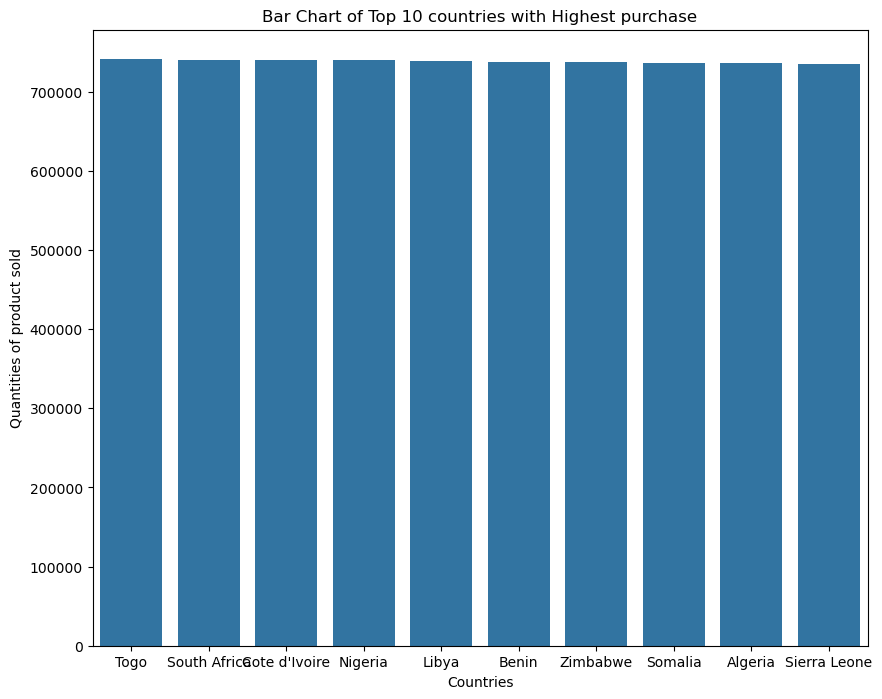

In [23]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()
quantity_by_country.head(3)

# Assuming quantity_by_country is already a DataFrame with 'Country' and 'Quantity' columns
top_10_country = quantity_by_country.head(10)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Country", y="Quantity", data = top_10_country)
plt.xlabel("Countries")
plt.ylabel("Quantities of product sold")
plt.title("Bar Chart of Top 10 countries with Highest purchase")
plt.show()


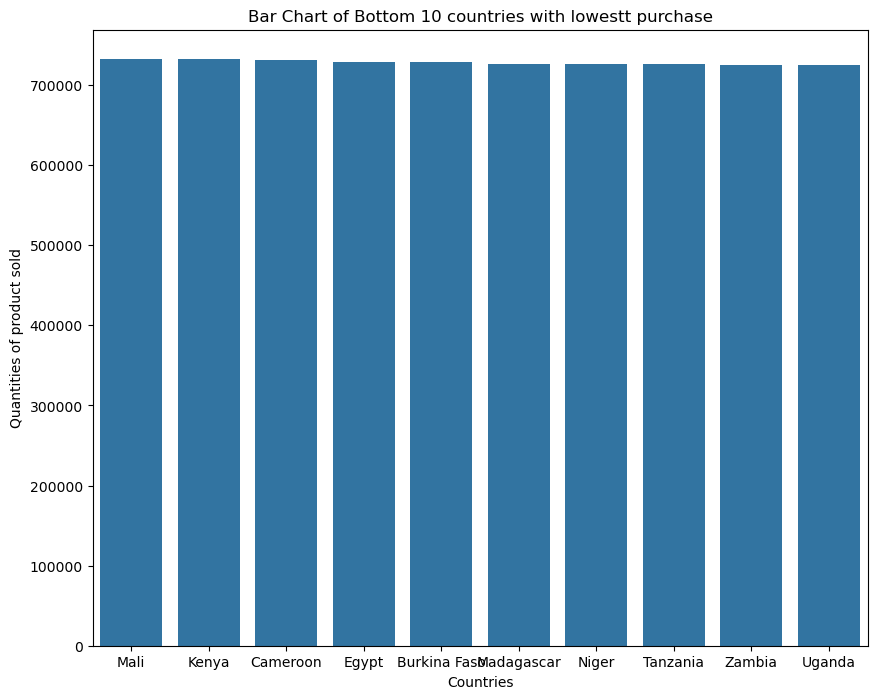

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming quantity_by_country is already a DataFrame with 'Country' and 'Quantity' columns
bottom_10_country = quantity_by_country.tail(10)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Country", y="Quantity", data=bottom_10_country)
plt.xlabel("Countries")
plt.ylabel("Quantities of product sold")
plt.title("Bar Chart of Bottom 10 countries with lowestt purchase")
plt.show()

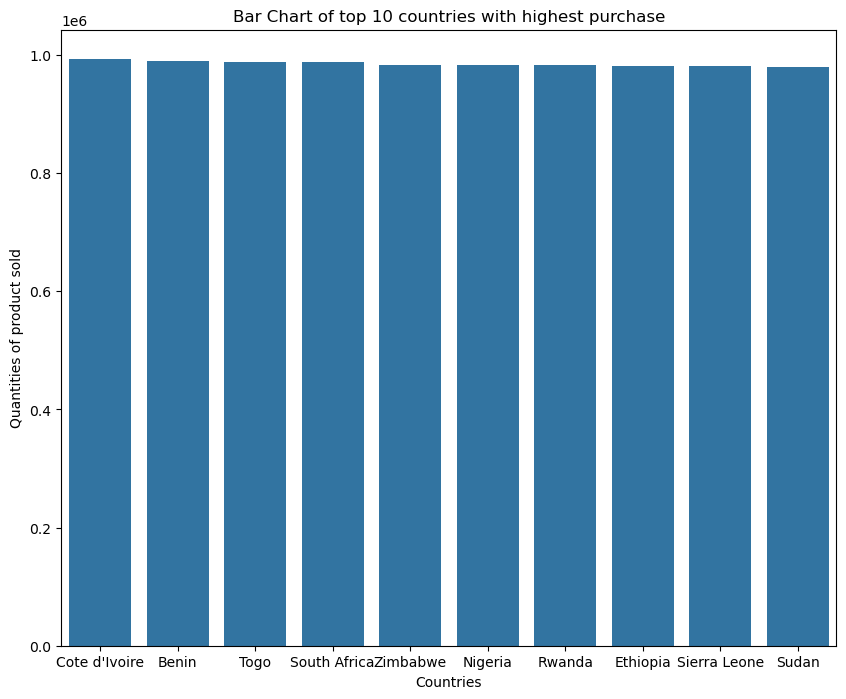

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Dataset_ecommerce.csv')

# Group by country and sum quantities
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()

# Sort countries by total quantity in descending order
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending=False).reset_index()

# Select top 10 countries
top_10_country = quantity_by_country.head(10)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Country", y="Quantity", data=top_10_country)
plt.xlabel("Countries")
plt.ylabel("Quantities of product sold")
plt.title("Bar Chart of top 10 countries with highest purchase")
plt.show()

Country     0
Quantity    0
dtype: int64


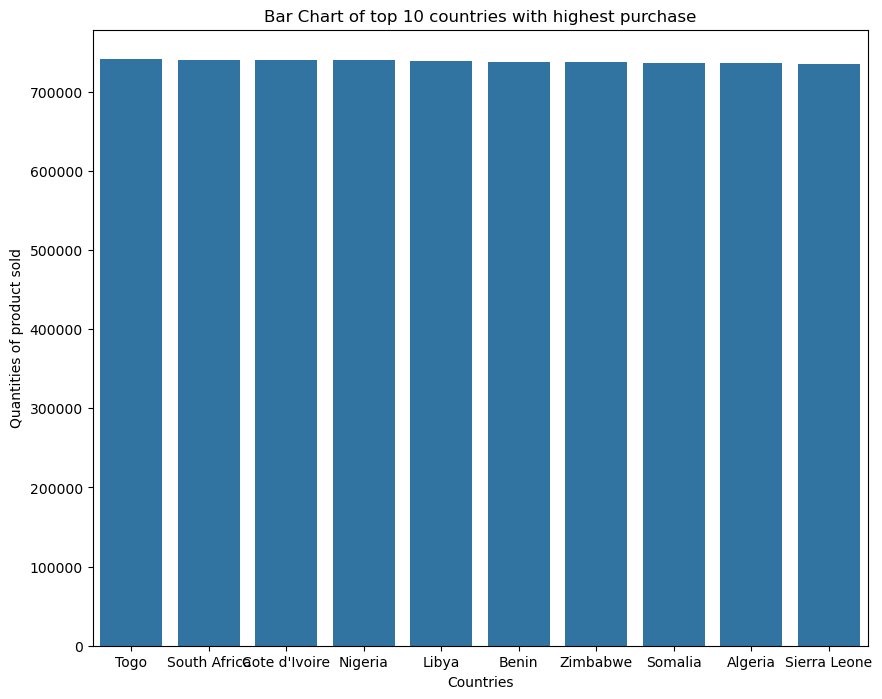

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Dataset_ecommerce.csv')

# Remove rows with missing 'CustomerID' (since it's not used)
data = data.dropna(subset=['CustomerID'])

# Check for missing data in 'Country' and 'Quantity' again
print(data[['Country', 'Quantity']].isnull().sum())

# Remove rows with missing 'Country' or 'Quantity' (if any remain)
data_clean = data.dropna(subset=['Country', 'Quantity'])

# Group by country and sum quantities
quantity_by_country = data_clean.groupby("Country")["Quantity"].sum().reset_index()

# Sort countries by total quantity in descending order
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending=False).reset_index(drop=True)

# Select top 10 countries
top_10_country = quantity_by_country.head(10)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Country", y="Quantity", data=top_10_country)
plt.xlabel("Countries")
plt.ylabel("Quantities of product sold")
plt.title("Bar Chart of top 10 countries with highest purchase")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16612\935372914.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


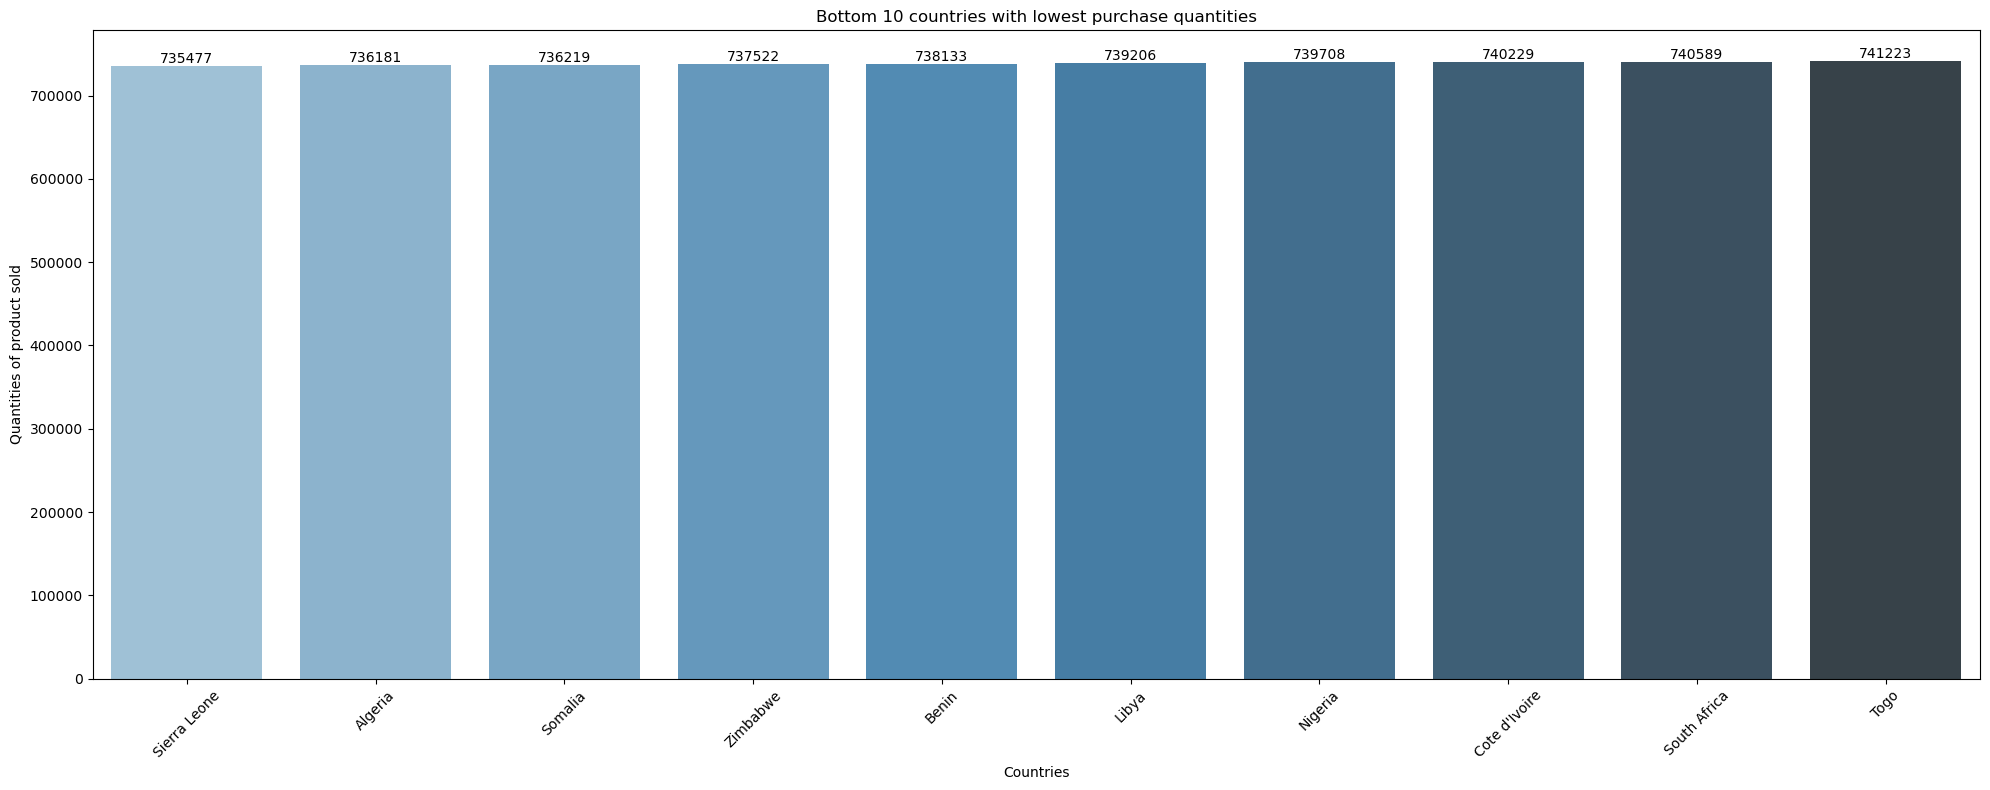

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_clean is already prepared
# Group by country and sum quantities
quantity_by_country = data_clean.groupby("Country")["Quantity"].sum().reset_index()

# Sort countries by total quantity in ascending order
quantity_by_country_sorted = quantity_by_country.sort_values("Quantity", ascending=True)

# Select bottom 10 countries
bottom_10_country = quantity_by_country_sorted.tail(10)

# Plot with sorted data
plt.figure(figsize=(20, 8))
ax = sns.barplot(
    x="Country",
    y="Quantity",
    data=bottom_10_country,
    palette="Blues_d",
    hue=None  # explicitly specify no hue
)

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel("Countries")
plt.ylabel("Quantities of product sold")
plt.title("Bottom 10 countries with lowest purchase quantities")
plt.tight_layout()
plt.show()